# **CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT**

![alt the text here](https://img.freepik.com/free-vector/hand-drawn-credit-score-concept_23-2149164575.jpg?w=900&t=st=1725263174~exp=1725263774~hmac=197f3bc36eb5de8aa69feb5e64d9e8d59bbc6d5c7073f6ecda5fba4e53e791f0)

**IMPORTING THE FEATURED DATA SET**

In [290]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

In [291]:
data=pd.read_csv('/content/NEW_FEATURE_DATASET(11R).CSV')
data.head()

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,22.083333
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,22.166667
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,22.250000
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,22.333333
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,22.416667


In [292]:
data.shape

(100000, 11)



*   The data set is very large,so it is very difficult to tune this large data in colab.so i spliting my data for modeling . taking first 8000 rows for modeling and tunning,then add remining to the model for final model



In [293]:
data = data[0:8000]

In [294]:
data

,Age,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_Years
0,23.0,1824.843333,3.0,3.0,7.0,26.822620,265.0,2,312.494089,0,22.083333
1,23.0,1824.843333,3.0,3.0,4.0,31.944960,266.0,3,284.629162,0,22.166667
2,23.0,1824.843333,3.0,3.0,7.0,28.609352,267.0,4,331.209863,0,22.250000
3,23.0,1824.843333,3.0,5.0,4.0,31.377862,268.0,5,223.451310,0,22.333333
4,23.0,1824.843333,3.0,6.0,4.0,24.797347,269.0,1,341.489231,0,22.416667
...,...,...,...,...,...,...,...,...,...,...,...
7995,52.0,3149.030833,7.0,27.0,9.0,34.545915,300.0,2,418.947213,1,25.000000
7996,52.0,3149.030833,7.0,27.0,10.0,27.779343,301.0,3,309.059581,1,25.083333
7997,52.0,3149.030833,7.0,27.0,10.0,39.153719,302.0,0,395.360325,2,25.166667
7998,52.0,3149.030833,7.0,28.0,12.0,33.486230,303.0,2,403.000036,1,25.250000


In [295]:
data.shape

(8000, 11)

RANDOM FOREST CLASSIFIER

In [296]:
y=data['Credit_Score']
x=data.drop(['Credit_Score'],axis=1)

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [299]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [300]:
y_prediction_rf=rf_clf.predict(X_test)

In [301]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix,accuracy_score


In [302]:
print(confusion_matrix(y_test,y_prediction_rf))


[[219   1  80]
 [  7 414  69]
 [ 60  84 666]]


In [303]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       300
           1       0.83      0.84      0.84       490
           2       0.82      0.82      0.82       810

    accuracy                           0.81      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.81      0.81      0.81      1600



# **CROSS VALIDATION**



*   **appling kfold cross validation**



In [304]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10)



*  **printing the folds**



In [305]:
for train_index,test_index in kf.split(x):
  print('train_index:',train_index)
  print('test_index:',test_index)

train_index: [ 800  801  802 ... 7997 7998 7999]
test_index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23



*   **calculating the cross validation score for the fold**



In [306]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('cross validation scores are {}'.format(score))

cross validation scores are [0.67875 0.605   0.62375 0.61625 0.62125 0.58125 0.575   0.57375 0.6025
 0.6175 ]




*  **getting the avg score**



In [307]:
score=cross_val_score(rf_clf,x,y,cv=kf)
print('averagecross validation scores: {}'.format(score.mean()))

averagecross validation scores: 0.61525


# **TUNNIG**

In [308]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# Set max_depth range between 3 and 10 (as per the ideal range)
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth=val), x, y, cv=kf, scoring='accuracy')
    print(f'average score({val}): {score.mean():.3f}')


average score(3): 0.610
average score(4): 0.619
average score(5): 0.613
average score(6): 0.594
average score(7): 0.586
average score(8): 0.569
average score(9): 0.569
average score(10): 0.568


In [309]:
parameter = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2']
}

**importing grid search cv**

In [330]:
from sklearn.model_selection import GridSearchCV

In [311]:
#importing random forest classifier

from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    parameter, cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

In [312]:
grid_result=grid_search.fit(X_train,y_train)

In [313]:
# to see the best combination of parameters

print('Best_params',grid_result.best_params_)
print('Best_score',grid_result.best_score_)

Best_params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best_score 0.78546875


In [317]:

# Define the RandomForestClassifier with the specified parameters
rf_clf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=20,            # Maximum depth of each tree
    max_features='sqrt',     # Consider the square root of the number of features for the best split
    min_samples_leaf=1,      # Minimum number of samples required at a leaf node
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    random_state=42          # To ensure reproducibility
)

# Fit the model with training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [318]:
y_prediction_rf=rf_clf.predict(X_test)

In [319]:
# For Precision, Recall, and F1 with 'weighted' average
precision = precision_score(y_test, y_prediction_rf, average='weighted')
recall = recall_score(y_test, y_prediction_rf, average='weighted')
f1 = f1_score(y_test, y_prediction_rf, average='weighted')

# Print the classification report (which also handles multiclass)
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       300
           1       0.83      0.86      0.84       490
           2       0.83      0.82      0.82       810

    accuracy                           0.82      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.82      0.82      0.82      1600



**Select 100 Rows from the Last 2000 Rows:**



*    Randomly selecting 100 rows from the last 2000 rows



In [324]:
sample_indices = np.random.choice(X_test.index, 100, replace=False)
X_eval = X_test.loc[sample_indices]        # X_test does not include 'Credit_Score'
y_eval = y_test.loc[sample_indices]        # y_test is where 'Credit_Score' is stored

print("Selected 100 rows from the last 2000 rows for evaluation.")

Selected 100 rows from the last 2000 rows for evaluation.


**Evaluation Function to Predict on the 100 Rows:**

In [325]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Define the evaluation function
def evaluate_model(rf_clf, X_test, y_test, output_file='inference.xlsx'):
    # Predict the labels for the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Generate classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })

    # Save results to an Excel file
    with pd.ExcelWriter(output_file) as writer:
        results_df.to_excel(writer, sheet_name='Predictions', index=False)
        pd.DataFrame([{'Accuracy': accuracy}]).to_excel(writer, sheet_name='Accuracy', index=False)
        pd.DataFrame(class_report).transpose().to_excel(writer, sheet_name='Classification Report')

    print(f'Inference results saved to {output_file}')

# Example usage
# Assuming rf_clf is your trained model, and X_test, y_test are the test data
evaluate_model(rf_clf, X_eval, y_eval)


Accuracy: 0.87
Inference results saved to inference.xlsx


** Retrain the Model with Additional Data**

In [326]:
# Combine the initial 8000 rows with the 100 selected rows for retraining
X_combined = pd.concat([X_train, X_eval])
y_combined = pd.concat([y_train, y_eval])

# Retrain the model with the combined data
rf_clf.fit(X_combined, y_combined)
print("Model retrained with the additional 100 rows.")

Model retrained with the additional 100 rows.


In [328]:
import pickle

# Save the model using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_clf, model_file)

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


# **Model Interpretability: Feature Importance Analysis**

In [331]:
import matplotlib.pyplot as plt
import numpy as np



*    Get feature importances from the trained Random Forest model



In [337]:
feature_importances = rf_clf.feature_importances_



*    Get the feature names (assuming your DataFrame columns are used for training)



In [339]:
feature_names = X_train.columns



*   Create a DataFrame for visualization



In [340]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})



*    Sort by importance for better visualization



In [341]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)



*   Plot the feature importances



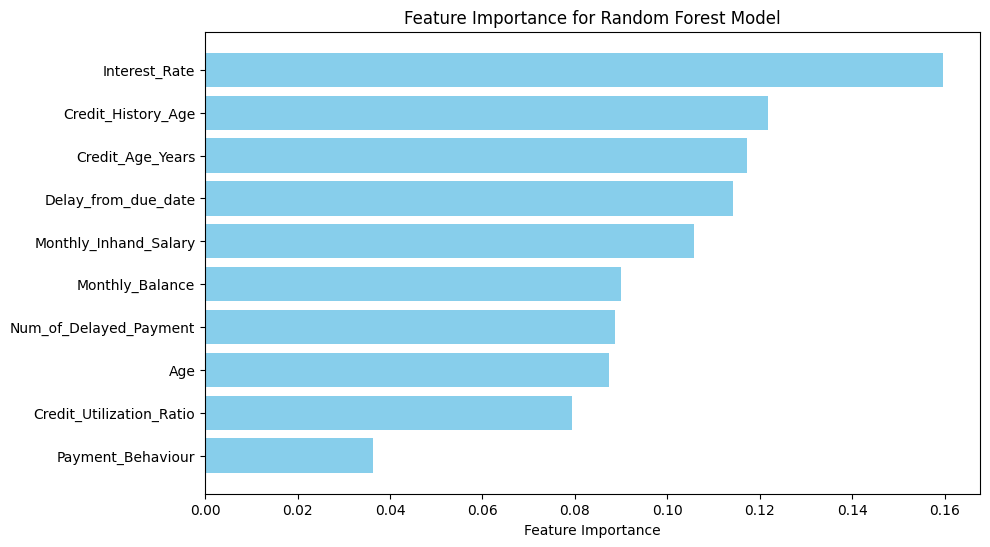

In [342]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()



**1.   Top Features:**





*   Interest Rate: The most important feature in the model. This makes sense because the interest rate directly influences a person's ability to pay back loans, which can heavily impact their credit score.

*   Credit History Age: This feature is the second most important. A longer credit history often indicates that the individual has had more time to demonstrate responsible credit behavior, leading to a better credit score.



*   Credit Age (Years): Another key feature, as the age of credit is a strong predictor of reliability. The older an individual's credit accounts, the more data there is to evaluate their creditworthiness.

*   Delay from Due Date: This feature measures how often payments are delayed beyond the due date. Late payments are a strong negative indicator of creditworthiness, so it’s natural that this feature would have high importance.









**2.   Medium Importance Features:**





*   Monthly Inhand Salary: The salary influences an individual's ability to make payments, so it's a significant factor in determining credit risk.

*   Monthly Balance: This feature measures the remaining balance after expenses, which may indicate whether a person is managing their finances well.

*   Number of Delayed Payments: The more often someone has delayed payments, the worse their credit score is likely to be. This feature directly affects the score.


*  Age: Older individuals often have longer credit histories and more data to assess their creditworthiness, which is why age has medium importance.





**3. Lower Importance Features:**





*   Credit Utilization Ratio: While it is still an important feature, it's slightly lower in importance. This measures how much of the available credit is being used, which is a key factor for credit scoring, but in this case, not as significant as other features.

*   Payment Behavior: Although it's lower in the ranking, payment behavior can still provide some insights into a person's financial discipline and their ability to pay back loans.



# **Performance Validation: Validate Model on the Testing Dataset**

In [343]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



*    Make predictions on the test set



In [344]:
y_pred = rf_clf.predict(X_test)



*    Calculate accuracy



In [353]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82




*    Print classification report (includes precision, recall, F1-score)



In [354]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       300
           1       0.83      0.86      0.84       490
           2       0.83      0.83      0.83       810

    accuracy                           0.82      1600
   macro avg       0.82      0.81      0.82      1600
weighted avg       0.82      0.82      0.82      1600





*   Display the confusion matrix



In [355]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[228   1  71]
 [  7 419  64]
 [ 53  86 671]]




*    Optional: Visualize confusion matrix using seaborn heatmap



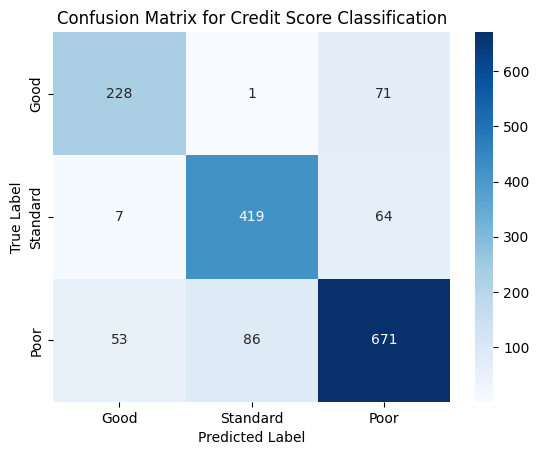

In [356]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Standard', 'Poor'], yticklabels=['Good', 'Standard', 'Poor'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Credit Score Classification')
plt.show()

**True Positive (Correct Predictions):**



*   Good : 228 instances were correctly predicted as "Good."

*   Standard : 419 instances were correctly predicted as "Standard."


*   poor : 671 instances were correctly predicted as "Poor."





**False Positive (Incorrect Predictions):**




*   Good predicted as Poor: 53 instances.

*   Good predicted as Standard: 1 instance.

*   Standard predicted as Poor: 64 instances.
*   Standard predicted as Good: 7 instances.


*   Poor predicted as Standard: 86 instances.


*   Poor predicted as Good: 71 instances.










# **Threshold Selection: Adjust Classification Thresholds**

By default, Random Forest classifiers use a threshold of 0.5 for binary or multi-class classification. However, we can adjust this threshold based on business needs (e.g., if we want to be more cautious in classifying someone as having a "Poor" credit score).

To change the threshold, we can use predict_proba to get the probabilities for each class and adjust the threshold accordingly.

In [376]:
#Get the predicted probabilities for the test set
y_probs = rf_clf.predict_proba(X_test)

In [371]:
# Extract the probabilities for the "Poor" class (assuming it's the 3rd class in the dataset)
# You can check class labels using: rf_clf.classes_
poor_class_probs = y_probs[:, 2]  # Assuming the 3rd column corresponds to 'Poor' class

In [372]:
# Set a custom threshold (e.g., 0.6 instead of 0.5)
threshold = 0.6


*  Adjust predictions based on the new threshold




In [373]:
y_pred_adjusted = np.where(poor_class_probs > threshold, 1, y_pred)  # Modify this for other classes as needed

In [374]:
# Validate the adjusted predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy with threshold {threshold}: {accuracy_adjusted:.2f}")

Accuracy with threshold 0.6: 0.47


In [375]:
# Optional: Print the classification report and confusion matrix with the adjusted threshold
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       300
           1       0.38      0.91      0.54       490
           2       0.53      0.09      0.15       810

    accuracy                           0.47      1600
   macro avg       0.57      0.59      0.49      1600
weighted avg       0.53      0.47      0.39      1600



In [377]:
import pickle

# Save the model using pickle
with open('random_forest_model.FINAL.pkl', 'wb') as model_file:
    pickle.dump(rf_clf, model_file)

print("Model saved as random_forest_model.FINAL.pkl")

Model saved as random_forest_model.FINAL.pkl
